In [16]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

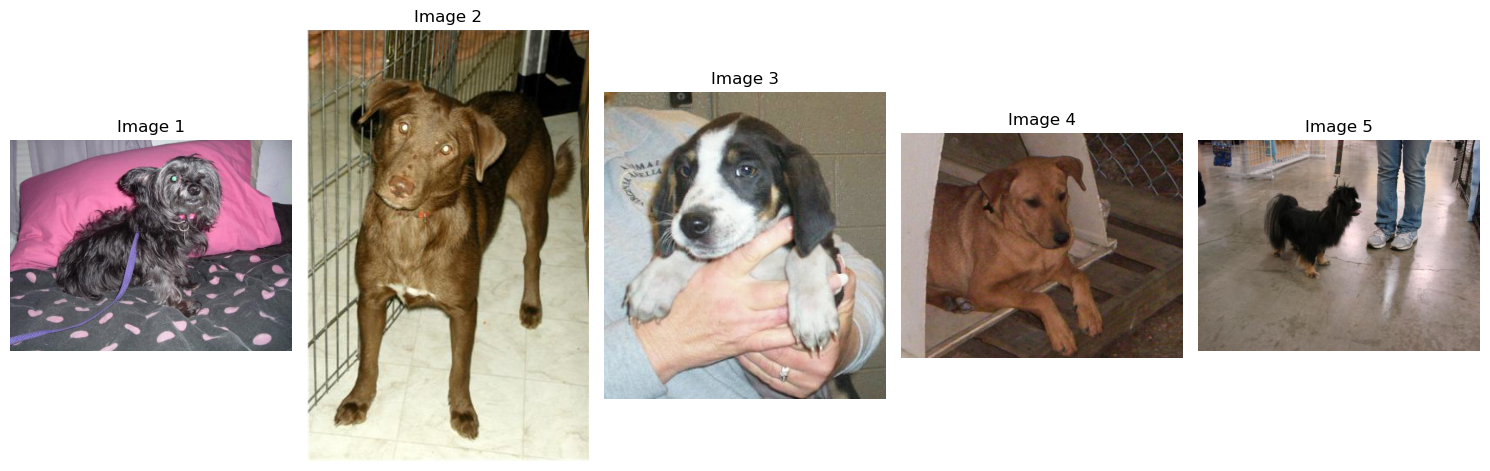

In [17]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Define the path to the 'Cat' folder
data_dir = r"C:\Users\SWAPNIL PATIL\OneDrive\kagglecatsanddogs_5340"
cat_dir = os.path.join(data_dir, "PetImages", "Cat")
dog_dir = os.path.join(data_dir, "PetImages", "Dog")

# List all files in the 'Cat' folder
cat_images = os.listdir(dog_dir)

# Display the first few images
num_images_to_display = 5  # Number of images to display
plt.figure(figsize=(15, 10))

for i, img_name in enumerate(cat_images[:num_images_to_display]):
    img_path = os.path.join(dog_dir, img_name)
    
    # Open the image using PIL
    img = Image.open(img_path)
    
    # Display the image using matplotlib
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(img)
    plt.title(f"Image {i + 1}")
    plt.axis("off")

plt.tight_layout()
plt.show()

## To Check Corrupt files or not:

In [18]:
from tensorflow.keras.preprocessing import image

# Check for corrupt images
def check_images(directory):
    corrupted = []
    for img_name in os.listdir(directory):
        img_path = os.path.join(directory, img_name)
        try:
            img = image.load_img(img_path)
            img = image.img_to_array(img)
        except:
            corrupted.append(img_path)
    return corrupted

# Check both cat and dog directories
corrupted_cats = check_images(cat_dir)
corrupted_dogs = check_images(dog_dir)
print(f"Corrupted cat images: {len(corrupted_cats)}")
print(f"Corrupted dog images: {len(corrupted_dogs)}")

Corrupted cat images: 0
Corrupted dog images: 0


In [19]:
# Remove corrupt images
for img_path in corrupted_cats + corrupted_dogs:
    try:
        os.remove(img_path)
        print(f"Removed: {img_path}")
    except:
        print(f"Couldn't remove: {img_path}")

In [20]:
# ======================
# SECTION 1: SETUP & DATA PREPARATION
# ======================
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Set parameters
IMG_SIZE = (150, 150)
BATCH_SIZE = 32
INPUT_SHAPE = IMG_SIZE + (3,)  # 150x150 RGB


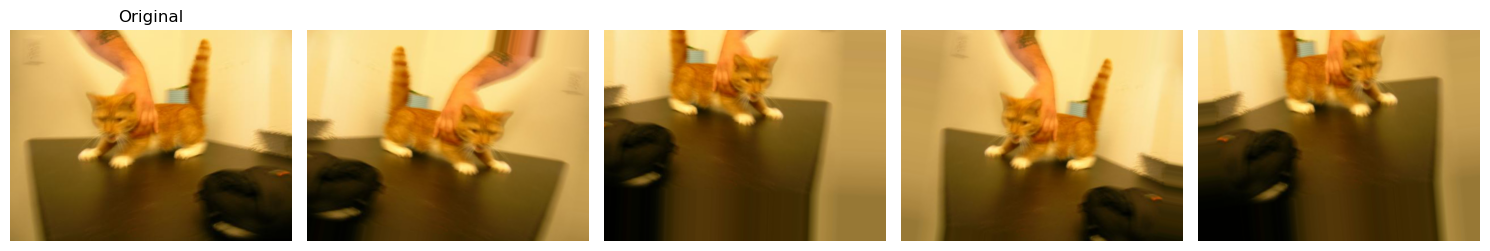

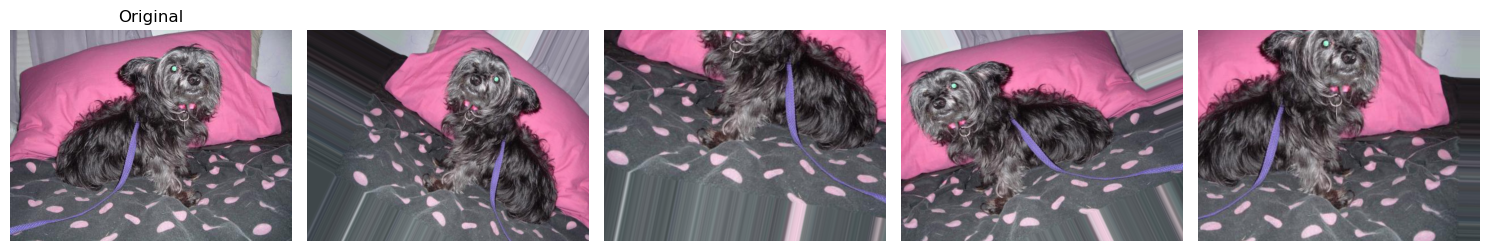

In [21]:

# ======================
# SECTION 2: DATA AUGMENTATION VISUALIZATION
# ======================
def visualize_augmentation(image_path):
    """Show original + 4 augmented versions of an image"""
    img = Image.open(image_path)
    plt.figure(figsize=(15, 5))
    
    # Original
    plt.subplot(1, 5, 1)
    plt.imshow(img)
    plt.title("Original")
    plt.axis('off')
    
    # Create augmentation generator
    datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    
    # Convert to array and reshape
    x = image.img_to_array(img)
    x = x.reshape((1,) + x.shape)
    
    # Generate augmented images
    for i, batch in enumerate(datagen.flow(x, batch_size=1)):
        plt.subplot(1, 5, i+2)
        plt.imshow(image.array_to_img(batch[0]))
        plt.axis('off')
        if i == 3:  # Show 4 augmented versions
            break
    
    plt.tight_layout()
    plt.show()

# Visualize for one cat and one dog image
sample_cat = os.path.join(cat_dir, os.listdir(cat_dir)[0])
sample_dog = os.path.join(dog_dir, os.listdir(dog_dir)[0])
visualize_augmentation(sample_cat)
visualize_augmentation(sample_dog)


In [22]:

# ======================
# SECTION 3: DATA GENERATORS
# ======================
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% for validation
)

# Training generator
train_generator = train_datagen.flow_from_directory(
    os.path.join(data_dir, "PetImages"),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

# Validation generator (no augmentation)
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
val_generator = val_datagen.flow_from_directory(
    os.path.join(data_dir, "PetImages"),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)


Found 20000 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.


In [23]:
# ======================
# SECTION 4: MODEL ARCHITECTURE
# ======================
model = Sequential([
    # First convolution block (detects edges)
    Conv2D(32, (3,3), activation='relu', input_shape=INPUT_SHAPE),
    MaxPooling2D(2,2),
    
    # Second block (detects textures)
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    # Third block (detects patterns)
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    # Classifier
    Flatten(),
    Dropout(0.5),  # Randomly turn off 50% neurons
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')  # Output probability
])


In [24]:
# ======================
# SECTION 5: MODEL COMPILATION
# ======================
model.compile(
    optimizer='adam',  # Adaptive learning rate
    loss='binary_crossentropy',  # For binary classification
    metrics=['accuracy']
)

# Print summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# ======================
# SECTION 6: TRAINING
# ======================
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,  # Stop if no improvement for 3 epochs
    restore_best_weights=True
)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    epochs=10,  # Reduced for quick testing
    callbacks=[early_stopping],
    verbose=1  # Ensure progress is printed
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 684s 1s/step - accuracy: 0.5343 - loss: 0.7188 - val_accuracy: 0.6548 - val_loss: 0.6267
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.5289
Epoch 3/10


C:\ProgramData\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


625/625 ━━━━━━━━━━━━━━━━━━━━ 568s 908ms/step - accuracy: 0.6383 - loss: 0.6293 - val_accuracy: 0.7276 - val_loss: 0.5370
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8333 - val_loss: 0.3499
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 599s 959ms/step - accuracy: 0.6984 - loss: 0.5765 - val_accuracy: 0.7670 - val_loss: 0.4995
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.2854
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 591s 945ms/step - accuracy: 0.7142 - loss: 0.5539 - val_accuracy: 0.7666 - val_loss: 0.4822
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 193us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.5916
Epoch 9/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 585s 936ms/step - accuracy: 0.7313 - loss: 0.5353 - val_accuracy: 0.7812 - val_loss: 0.4642


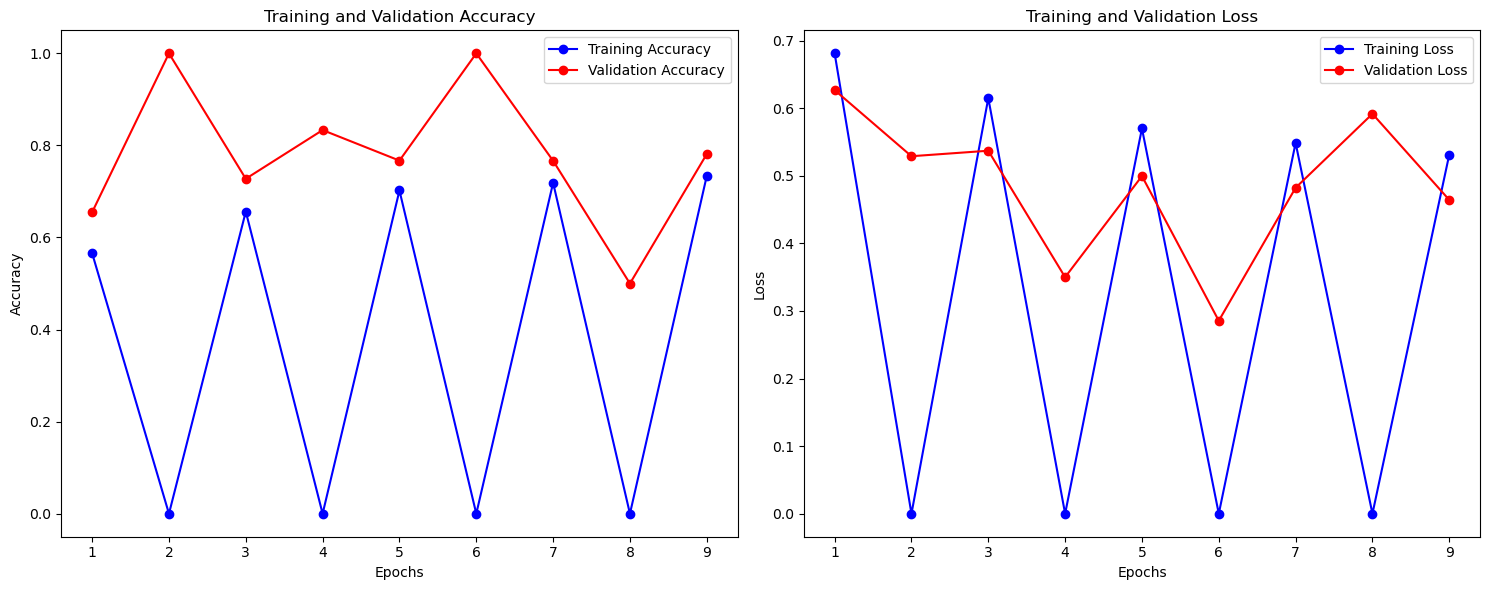

In [26]:
# ======================
# SECTION 7: EVALUATION
# ======================
# Plot training history
def plot_history(history):
    # Extract metrics
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1, len(acc) + 1)  # Correct epoch numbering
    
    plt.figure(figsize=(15, 6))
    
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Ensure history exists before plotting
if 'history' in locals():
    plot_history(history)
else:
    print("Training history not found! Check model.fit() execution.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


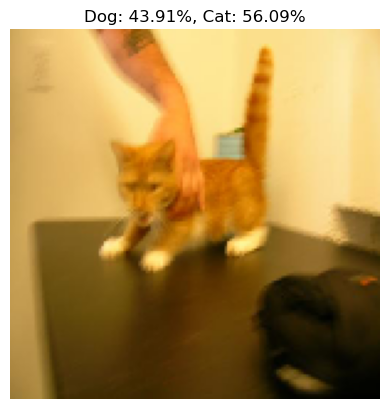

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


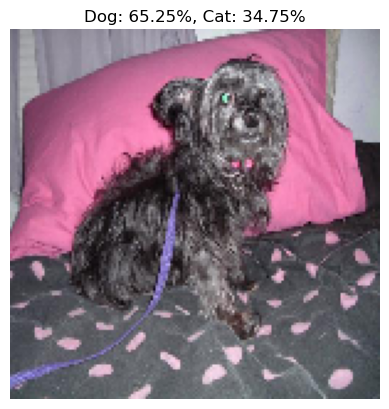

In [27]:
# ======================
# SECTION 8: SAMPLE PREDICTIONS
# ======================
def predict_image(img_path):
    img = image.load_img(img_path, target_size=IMG_SIZE)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0) / 255.
    
    pred = model.predict(x)[0][0]
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Dog: {pred:.2%}, Cat: {(1-pred):.2%}")
    plt.show()

# Test on sample images
predict_image(sample_cat)
predict_image(sample_dog)